In [1]:
import glob
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Setup some constants for use in the analysis:

# Goal is to filter out some of the chain coffee shops to only count independent shops
# This should be less of a problem with the bikeshops and breweries
BAD_COFFEE = ['donut', 'starbucks', 'dunkin', 'caribou', 'peet', 'mcdonald', 'tea']

# Population data is taken from the city wikipedia pages for cities only
POPULATIONS = {"denver": 704621, "portland": 639863, "sacramento": 495234}

# Just keeping this to filter out the file
API_CONFIG_FILE = "api_config.json"

In [3]:
# Loop through the files to collect aggregated information into a single dataframe
files = glob.glob("data/*.json")
files = [file for file in files if file != API_CONFIG_FILE]

# Set up a dataframe to collect aggregate results
columns_list = ['Category', 'City', 'Total', 'PerCapita']
results = pd.DataFrame(columns=columns_list)


# Then loop through each of the files to get the information we want
for file in files:
    name = file.split('.')[0].split('/')[1]
    cat = name.split('_')[1].lower()
    city = name.split('_')[0].lower()
    df = pd.read_json(file)

    # Looking to only keep small/independent coffee shops and not major chains
    if 'coffee' in name:
        for bad in BAD_COFFEE:
            df = df[df.name.str.lower().str.contains(bad)==False]
    # Aggregate Results
    result = {'Category': [cat], 'City': [city]}
    result['Total'] = [df.name.count()]
    result['PerCapita'] = [df.name.count() /  (POPULATIONS[city]/100000)]
    pd.DataFrame.from_dict(result)
    results = pd.concat([results, pd.DataFrame.from_dict(result)])
    
    # Individual Ratings (TODO)
#     rating = df.loc[:,["rating", "location"]]
#     rating["Category"] = cat
#     rating["City"] = city
#     ratings = pd.concat([ratings, rating])

In [4]:
results.City = results.City.str.title()
results

,Category,City,PerCapita,Total
0,coffee,Sacramento,24.836744,123
0,coffee,Portland,67.670736,433
0,breweries,Sacramento,4.240420,21
0,bikes,Portland,13.127810,84
0,bikes,Denver,7.663694,54
0,bikes,Sacramento,6.663517,33
0,coffee,Denver,32.357821,228
0,breweries,Portland,15.628345,100
0,breweries,Denver,13.056665,92


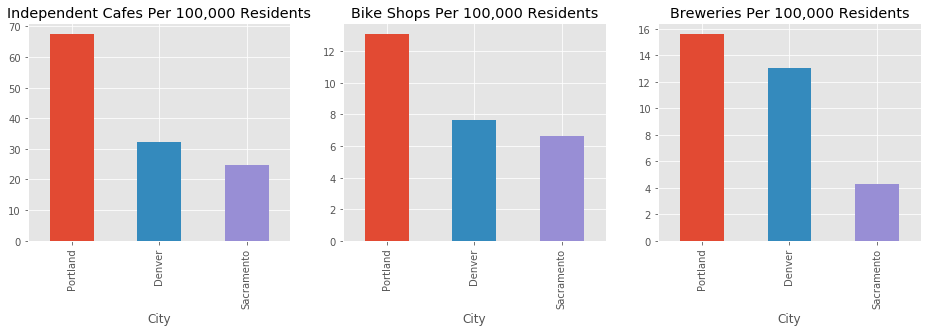

In [5]:
fig, axes = plt.subplots(1,3, figsize=(16,4))

results_coffee = results[results.Category=="coffee"]
results_coffee.set_index('City', inplace=True)
results_coffee = results_coffee.sort_values('PerCapita', ascending=False)

ax_coffee = results_coffee.PerCapita.plot(kind='bar', ax=axes[0])
_ = ax_coffee.set_title('Independent Cafes Per 100,000 Residents')

results_bikes = results[results.Category=="bikes"]
results_bikes.set_index('City', inplace=True)
results_bikes = results_bikes.sort_values('PerCapita', ascending=False)

ax_bikes = results_bikes.PerCapita.plot(kind='bar', ax=axes[1])
_ = ax_bikes.set_title('Bike Shops Per 100,000 Residents')

results_breweries = results[results.Category=="breweries"]
results_breweries.set_index('City', inplace=True)
results_breweries = results_breweries.sort_values('PerCapita', ascending=False)

ax_breweries = results_breweries.PerCapita.plot(kind='bar', ax=axes[2])
_ = ax_breweries.set_title('Breweries Per 100,000 Residents')
